# Introduction to Machine Learning

Author: Brandon Smith  

GitHub Repository:  
https://github.com/YOUR_USERNAME/datafun-07-ml

## Part 1 - Chart a Straight Line

We demonstrate a simple linear relationship using the Fahrenheit-to-Celsius conversion formula:

C = 5/9(F − 32)

This follows the slope-intercept form:

y = mx + b

Where:
- m = slope (5/9)
- b = intercept (-160/9)
- x = Fahrenheit
- y = Celsius

In [36]:
# Lambda function to convert Fahrenheit to Celsius
c = lambda f: 5 / 9 * (f - 32)

# Create Fahrenheit values 0–100 in increments of 10
temps = [(f, c(f)) for f in range(0, 101, 10)]

temps

[(0, -17.77777777777778),
 (10, -12.222222222222223),
 (20, -6.666666666666667),
 (30, -1.1111111111111112),
 (40, 4.444444444444445),
 (50, 10.0),
 (60, 15.555555555555557),
 (70, 21.11111111111111),
 (80, 26.666666666666668),
 (90, 32.22222222222222),
 (100, 37.77777777777778)]

In [37]:
temps_df = pd.DataFrame(temps, columns=["Fahrenheit", "Celsius"])
temps_df

,Fahrenheit,Celsius
0,0,-17.78
1,10,-12.22
2,20,-6.67
3,30,-1.11
4,40,4.44
5,50,10.00
6,60,15.56
7,70,21.11
8,80,26.67
9,90,32.22


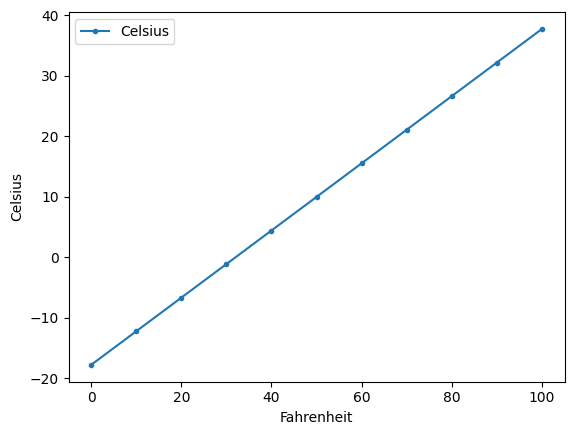

In [38]:
axes = temps_df.plot(
    x="Fahrenheit",
    y="Celsius",
    style=".-"
)

axes.set_ylabel("Celsius")
plt.show()

## PART 2 – Predict Avg High Temp in NYC in January

## Part 2 - Prediction

We now use simple linear regression to forecast NYC average January high temperatures.

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### Section 1 - Data Acquisition

In [39]:
nyc_df = pd.read_csv("../data/ave_hi_nyc_jan_1895-2018.csv")
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


### Section 2 - Data Inspection

In [40]:
nyc_df.tail()
nyc_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     124 non-null    int64  
 1   Value    124 non-null    float64
 2   Anomaly  124 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.0 KB


### Section 3 - Data Cleaning

In [41]:
# Rename columns for clarity
nyc_df.columns = ["Date", "Temperature", "Anomaly"]

# Remove the month (01) from Date by dividing by 100
nyc_df["Date"] = nyc_df["Date"].floordiv(100)

nyc_df.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


### Section 4 - Descriptive Statistics

In [42]:
pd.set_option("display.precision", 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [45]:
linear_regression = stats.linregress(
    x=nyc_df.Date,
    y=nyc_df.Temperature
)

linear_regression.slope, linear_regression.intercept

(np.float64(0.014771361132966163), np.float64(8.694993233674289))

### Section 6 - Predict

In [ ]:
prediction_2024 = (
    linear_regression.slope * 2024 +
    linear_regression.intercept
)

prediction_2024

np.float64(38.5922281667978)

### Section 7 - Visualization

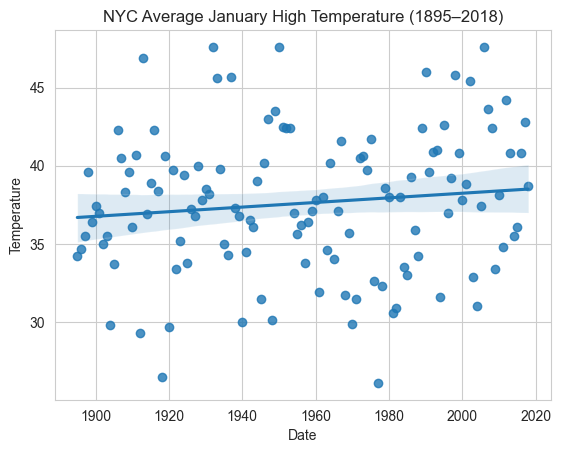

In [ ]:
sns.set_style("whitegrid")

sns.regplot(
    x="Date",
    y="Temperature",
    data=nyc_df
)

plt.title("NYC Average January High Temperature (1895–2018)")
plt.show()

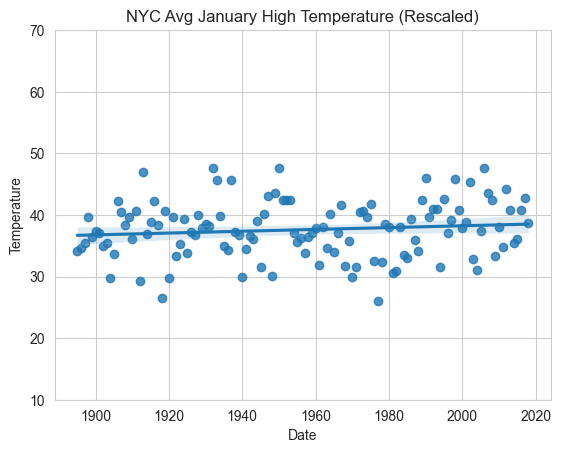

In [ ]:
axes = sns.regplot(
    x="Date",
    y="Temperature",
    data=nyc_df
)

axes.set_ylim(10, 70)
plt.title("NYC Avg January High Temperature (Rescaled)")
plt.show()

## Part 3 - Prediction (Using scikit-learn Estimator)

In this section, we reimplement simple linear regression using scikit-learn's `LinearRegression` estimator. 

We split the dataset into training and testing sets, train the model, evaluate it, make predictions, and visualize the regression line.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("../data/ave_hi_nyc_jan_1895-2018.csv")
df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [ ]:
df.columns = ['Date', 'Temperature', 'Anomaly']
df.head()

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [ ]:
df['Date'] = df['Date'].floordiv(100)
df.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


### Section 1 - Build the Model

In [ ]:
X = df['Date'].values.reshape(-1, 1)
y = df['Temperature'].values

X[:5], y[:5]

(array([[1895],
        [1896],
        [1897],
        [1898],
        [1899]]),
 array([34.2, 34.7, 35.5, 39.6, 36.4]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=11
)

X_train.shape, X_test.shape

((93, 1), (31, 1))

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
linear_regression.coef_

array([0.01939167])

In [ ]:
linear_regression.intercept_

np.float64(-0.30779820252656265)

### Section 2 - Test the Model

In [ ]:
predicted = linear_regression.predict(X_test)
expected = y_test

In [ ]:
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict

In [ ]:
predict = lambda x: linear_regression.coef_ * x + linear_regression.intercept_

predict(2024)

array([38.94094855])

### Section 4 - Visualization

(10.0, 70.0)

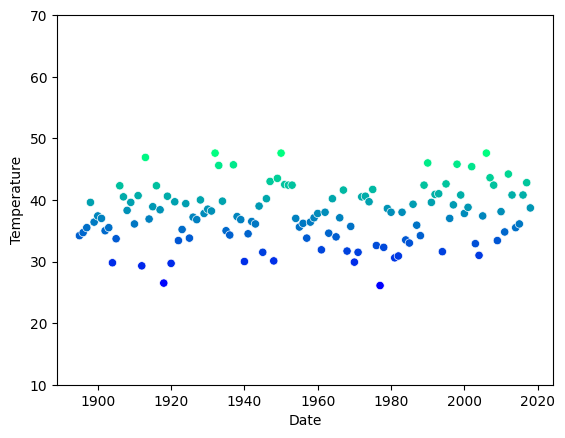

In [ ]:
axes = sns.scatterplot(
    data=df,
    x='Date',
    y='Temperature',
    hue='Temperature',
    palette='winter',
    legend=False
)

axes.set_ylim(10, 70)

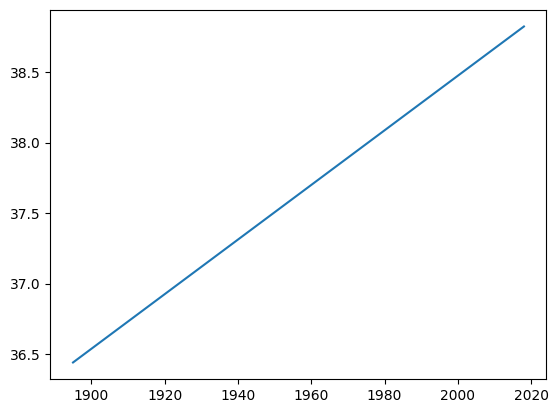

In [ ]:
x_values = pd.DataFrame([df['Date'].min(), df['Date'].max()])
y_values = linear_regression.predict(x_values)

plt.plot(x_values, y_values)
plt.show()

## Part 4 - Insights and Comparison

In this project, I implemented simple linear regression using two different approaches: SciPy’s `linregress()` function and scikit-learn’s `LinearRegression` estimator.

In Part 2, the SciPy method provided a direct statistical solution. It calculated the slope and intercept of the best-fit line using ordinary least squares. This approach was efficient and clear for understanding the mathematical foundation of regression. It allowed me to directly apply the equation y = mx + b to generate predictions.

In Part 3, I used scikit-learn’s `LinearRegression` model, which follows a more structured machine learning workflow. Instead of simply computing slope and intercept, I split the data into training and testing sets. This reflects how predictive models are built and evaluated in practice. By separating the data, the model can be trained on one portion and tested on unseen data to simulate real-world forecasting.

Both methods produced similar results, confirming that they are solving the same regression problem. However, the scikit-learn approach is more scalable and better suited for production-level machine learning tasks. It integrates naturally with additional tools such as preprocessing pipelines, cross-validation, and performance metrics.

From the results, the regression line shows a positive slope, indicating a gradual increase in average January high temperatures in NYC over time. While there is variability from year to year, the overall trend suggests warming.

Overall, the SciPy implementation strengthened my understanding of the underlying mathematics, while the scikit-learn implementation reinforced how regression is applied within a structured machine learning framework.